#### Token Normalization Pipeline from Scratch

RAW:  Café Müller’s résumé — naïve coöperate.
NORM: cafe muller's resume - naive cooperate.
------------------------------------------------------------
RAW:  car is NOT car.
NORM: car is not car.
------------------------------------------------------------
RAW:  HELLO   world!!!   
NORM: hello world!!!
------------------------------------------------------------
RAW:  Full-width ＡＢＣ characters and emoji 😊
NORM: full-width abc characters and emoji 😊
------------------------------------------------------------


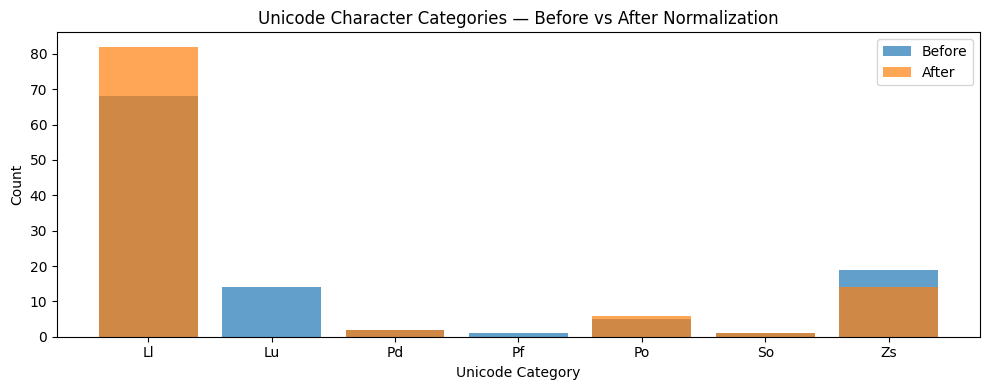

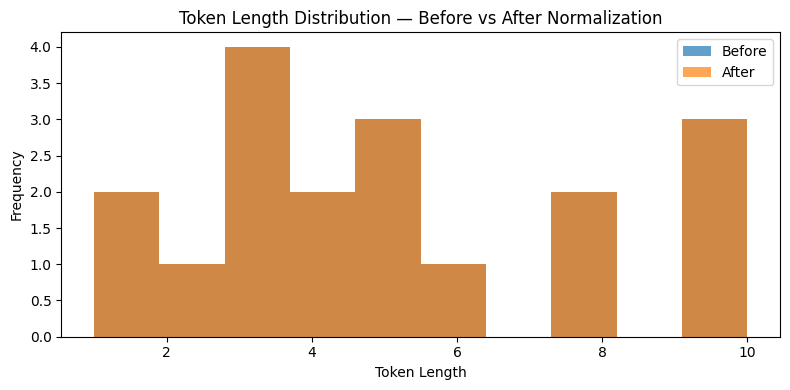

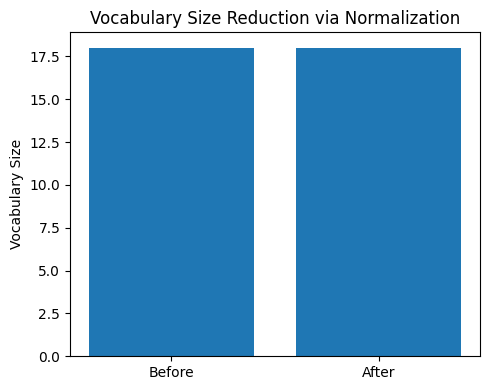

In [ ]:
import unicodedata
import re
import matplotlib.pyplot as plt
from collections import Counter

texts = [
    "Café Müller’s résumé — naïve coöperate.",
    "car is NOT car.",
    "HELLO   world!!!   ",
    "Full-width ＡＢＣ characters and emoji 😊"
]

def unicode_normalize(text, form="NFKC"):
    return unicodedata.normalize(form, text)

def case_fold(text):
    return text.casefold()

def remove_accents(text):
    return ''.join(
        c for c in unicodedata.normalize("NFD", text)
        if unicodedata.category(c) != "Mn"
    )

def normalize_punctuation(text):
    text = re.sub(r"[“”]", '"', text)
    text = re.sub(r"[‘’]", "'", text)
    text = re.sub(r"[‐-–—]", "-", text)
    return text

def normalize_whitespace(text):
    return re.sub(r"\s+", " ", text).strip()

def normalize_text(text):
    text = unicode_normalize(text, "NFKC")
    text = normalize_punctuation(text)
    text = case_fold(text)
    text = remove_accents(text)
    text = normalize_whitespace(text)
    return text

normalized_texts = [normalize_text(t) for t in texts]

for raw, norm in zip(texts, normalized_texts):
    print("RAW: ", raw)
    print("NORM:", norm)
    print("-" * 60)

def char_categories(texts):
    cats = Counter()
    for t in texts:
        for c in t:
            cats[unicodedata.category(c)] += 1
    return cats

before = char_categories(texts)
after = char_categories(normalized_texts)

labels = sorted(set(before) | set(after))
before_vals = [before[l] for l in labels]
after_vals = [after[l] for l in labels]

plt.figure(figsize=(10, 4))
plt.bar(labels, before_vals, alpha=0.7, label="Before")
plt.bar(labels, after_vals, alpha=0.7, label="After")
plt.title("Unicode Character Categories — Before vs After Normalization")
plt.xlabel("Unicode Category")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

def token_lengths(texts):
    lengths = []
    for t in texts:
        lengths.extend(len(tok) for tok in t.split())
    return lengths

before_lengths = token_lengths(texts)
after_lengths = token_lengths(normalized_texts)

plt.figure(figsize=(8, 4))
plt.hist(before_lengths, bins=10, alpha=0.7, label="Before")
plt.hist(after_lengths, bins=10, alpha=0.7, label="After")
plt.title("Token Length Distribution — Before vs After Normalization")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

def vocab(texts):
    v = set()
    for t in texts:
        v.update(t.split())
    return v

vocab_before = vocab(texts)
vocab_after = vocab(normalized_texts)

plt.figure(figsize=(5, 4))
plt.bar(["Before", "After"], [len(vocab_before), len(vocab_after)])
plt.title("Vocabulary Size Reduction via Normalization")
plt.ylabel("Vocabulary Size")
plt.tight_layout()
plt.show()